In [1]:
import pandas as pd

# Paths to files (replace with actual paths on Kaggle)
edges_path = '/kaggle/input/collab/COLLAB/COLLAB.edges'
graph_idx_path = '/kaggle/input/collab/COLLAB/COLLAB.graph_idx'
graph_labels_path = '/kaggle/input/collab/COLLAB/COLLAB.graph_labels'

# Load files
edges_df = pd.read_csv(edges_path, header=None, names=['source', 'target'])
graph_idx_df = pd.read_csv(graph_idx_path, header=None, names=['graph_id'])
graph_labels_df = pd.read_csv(graph_labels_path, header=None, names=['label'])


In [6]:
# Inspect the data
print(edges_df.head())
print(graph_idx_df.head())
print(graph_labels_df.head())

   source  target
0       1       2
1       2       1
2       1       3
3       3       1
4       1       4
   graph_id
0         1
1         1
2         1
3         1
4         1
   label
0      1
1      1
2      1
3      1
4      1


In [4]:
import networkx as nx

# Dictionary to hold graphs
subgraphs = {}

# Iterate over each unique graph_id
for graph_id in graph_idx_df['graph_id'].unique():
    # Get the indices where the graph_id matches
    mask = graph_idx_df['graph_id'] == graph_id
    indices = mask[mask].index
    
    # Get edges for this graph
    graph_edges = edges_df.iloc[indices].values
    
    # Create the graph
    G = nx.Graph()
    G.add_edges_from(graph_edges)
    
    # Assign a label to the graph (if exists)
    label = graph_labels_df.loc[graph_id, 'label'] if graph_id in graph_labels_df.index else None
    G.graph['label'] = label
    
    # Store the graph
    subgraphs[graph_id] = G


In [ ]:
for graph_id, G in subgraphs.items():
    print(f"Graph ID: {graph_id}, Label: {G.graph['label']}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    # Add additional analysis as needed


In [5]:
# Check for duplicates and missing values
print('null nodes', edges_df.isnull().sum())  # Check for missing values
print('duplicated nodes', edges_df.duplicated().sum())  # Check for duplicates

# Drop duplicates if necessary
edges_df.drop_duplicates(inplace=True)


null nodes source    0
target    0
dtype: int64
duplicated nodes 24574995


In [7]:
#checking if all duplicated nodes are deleted
print('duplicated nodes', edges_df.duplicated().sum())

duplicated nodes 0


In [8]:
# Compute network measures for each graph
for graph_id, G in subgraphs.items():
    # Average clustering coefficient
    avg_clustering = nx.average_clustering(G)
    
    # Degree centrality
    centrality = nx.degree_centrality(G)
    
    # Print some results
    print(f"Graph {graph_id}:")
    print(f"  Average Clustering Coefficient: {avg_clustering}")
    print(f"  Degree Centrality: {list(centrality.items())[:5]}")  # Show first 5 nodes


Graph 1:
  Average Clustering Coefficient: 0.0
  Degree Centrality: [(1, 1.0), (2, 0.043478260869565216), (3, 0.043478260869565216), (4, 0.043478260869565216), (5, 0.043478260869565216)]
Graph 2:
  Average Clustering Coefficient: 0.0
  Degree Centrality: [(24, 0.037037037037037035), (1, 0.8518518518518519), (25, 0.037037037037037035), (26, 0.037037037037037035), (27, 0.037037037037037035)]
Graph 3:
  Average Clustering Coefficient: 0.0
  Degree Centrality: [(6, 0.037037037037037035), (2, 1.0), (7, 0.037037037037037035), (8, 0.037037037037037035), (9, 0.037037037037037035)]
Graph 4:
  Average Clustering Coefficient: 0.0
  Degree Centrality: [(32, 0.058823529411764705), (2, 0.8823529411764706), (33, 0.058823529411764705), (34, 0.058823529411764705), (35, 0.058823529411764705)]
Graph 5:
  Average Clustering Coefficient: 0.0
  Degree Centrality: [(4, 0.04), (3, 1.0), (5, 0.04), (6, 0.04), (7, 0.04)]
Graph 6:
  Average Clustering Coefficient: 0.0
  Degree Centrality: [(28, 0.047619047619047

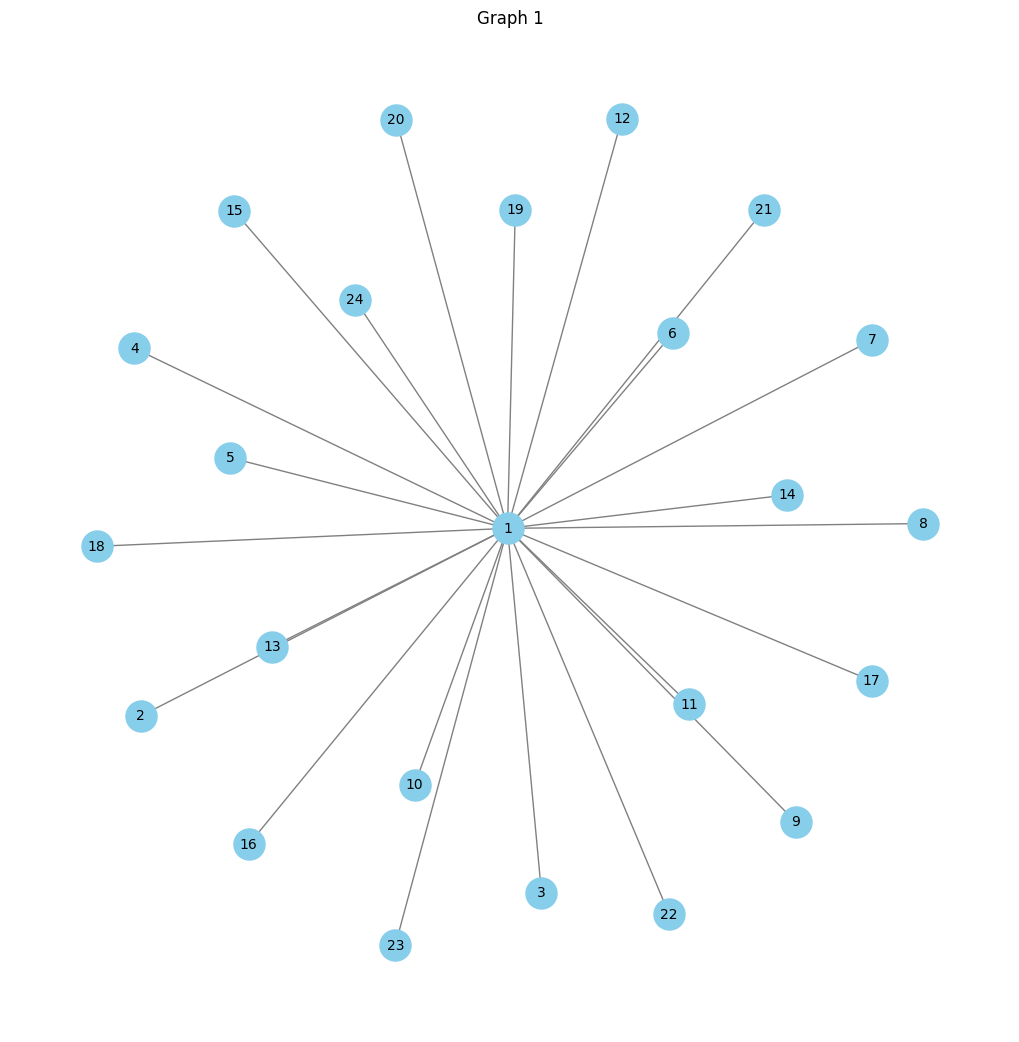

In [9]:
import matplotlib.pyplot as plt

# Visualize a single graph
sample_graph_id = list(subgraphs.keys())[0]  # Select the first graph
G = subgraphs[sample_graph_id]

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", font_size=10, edge_color="gray")
plt.title(f"Graph {sample_graph_id}")
plt.show()
